# VIGNESAN K B
GRIP @ THE SPARKS FOUNDATION
Task 2- Unsupervised Learning (K Means Clustering) - Iris Dataset
Prediction Using Unsupervised Machine Learning(Using K-means Clustering Algorithm)
"To predict the optimum number of clusters and to represent visually from given dataset iris"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#convert iris_data into panda dataframe
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_x_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
#shows columns and rows
iris_x_df.shape

(150, 4)

In [4]:
#to check any column is null
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
from sklearn.cluster import KMeans
x = iris_x_df.iloc[:, :].values
wcs = []  #wcss stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++',    
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)                                          
    wcs.append(model.inertia_)                       

print(wcs)

C:\Users\home\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.03998724608725, 34.299712121212146, 30.063110617452732, 28.124129261089806, 26.094324740540422, 24.492395286730822, 22.713918404916985, 21.690983282068828, 20.049091382301917, 18.898246810207333, 17.905960735171274, 16.890723502597073, 16.46601160097213, 15.280046703296708, 14.904289072039074]


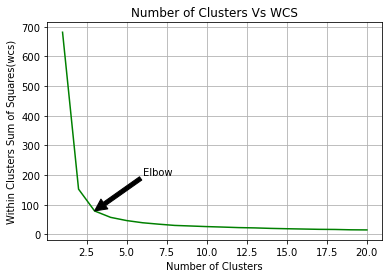

In [8]:
#plot wcs values and no.of clusters to find elbow
plt.plot(range(1, 21), wcs, color = 'green')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'black'})
plt.grid() 
plt.show()

In [9]:
#set no.of clusters equal to 3
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(x)   
#to train and predict model

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

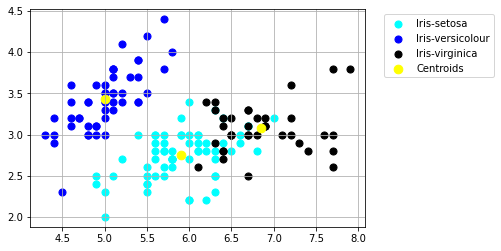

In [11]:
# Plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data
plt.scatter(x[y == 0, 0], x[y == 0, 1], 
            s = 50, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')   
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of each clusters
#three clusters are represented here with three colours
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 75, c = 'yellow', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

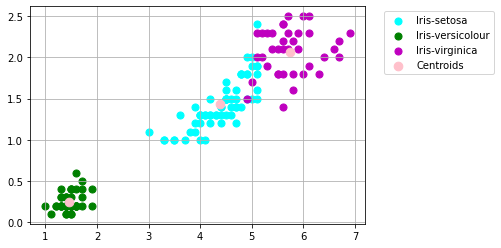

In [12]:
# Plotting the three clusters of third and fourth columns(petal length, petal width) of Iris data
plt.scatter(x[y == 0, 2], x[y == 0, 3], 
            s = 50, c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3], 
            s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 2], x[y == 2, 3],
            s = 50, c = 'm', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3], 
            s = 75, c = 'pink', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

Result: predicted the optimum number of clusters and to represent visually from given dataset "iris"